In [312]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
from itertools import cycle, islice
import seaborn as sns
import pandas as pd
import csv
import json
import ast
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from six.moves import cPickle as pickle
import warnings
warnings.filterwarnings('ignore')

In [313]:
pd.options.display.max_columns = None # quitamos la acotación al número de columnas

# Construcción del Dataset

In [314]:
def load_data(file_path):
    df = pd.read_csv(file_path, dtype='unicode')
    # all json columns`
    columns = df.columns
    for column in columns:
        # usamos ast.literal_eval() para evaluar lo que hay dentro del objeto json y convertilo tipos conocicos por Python
        df[column] = df[column].apply(lambda x: np.nan if pd.isnull(x) else ast.literal_eval(x))
    return df

MOVIES METADATA

In [315]:
metadata = pd.read_csv('./Datasets/movies_metadata.csv')
metadata.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


In [316]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [317]:
metadata.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


In [318]:
# Obtenemos el índice de varias peliculas para eliminarlas, ya que tienen los valores desplazados 
#varias posicones a la izquierda y no era posible obtener su id y más datos relevantes.
index = metadata[np.isnan(metadata['revenue'])].index.tolist()
metadata = metadata.drop(index, axis = 0) 
metadata = metadata.reset_index(drop=True)

In [319]:
ast.literal_eval(metadata["belongs_to_collection"][4])

{'id': 96871,
 'name': 'Father of the Bride Collection',
 'poster_path': '/nts4iOmNnq7GNicycMJ9pSAn204.jpg',
 'backdrop_path': '/7qwE57OVZmMJChBpLEbJEmzUydk.jpg'}

In [320]:
ast.literal_eval(metadata["belongs_to_collection"][0])["name"]

'Toy Story Collection'

In [321]:
ast.literal_eval(metadata["genres"][0])

[{'id': 16, 'name': 'Animation'},
 {'id': 35, 'name': 'Comedy'},
 {'id': 10751, 'name': 'Family'}]

In [322]:
ast.literal_eval(metadata["genres"][0])[0]["id"]

16

In [323]:
ast.literal_eval(metadata["spoken_languages"][0])

[{'iso_639_1': 'en', 'name': 'English'}]

In [324]:
def load_metadata(df):
    # all json columns`
    columns = df.columns
    for column in columns:
        # usamos ast.literal_eval() para evaluar lo que hay dentro del objeto json y convertilo tipos conocicos por Python
        df[column] = df[column].apply(lambda x: np.nan if pd.isnull(x) else ast.literal_eval(x))
    return df

In [325]:
metadata_json = load_metadata(metadata.iloc[:, [1, 3, 12, 13, 17]])

In [326]:
def df_metadata_json(df):
    dframe = pd.DataFrame(index=range(len(df)),
                          columns=["belongs_to_collection", "genres", "production_companies",
                                  "production_countries", "spoken_languages"])
    
    for fila in range(len(df)):
        lista_i = []
        lista_g = []
        lista_c = []
        lista_coun = []
        lista_l = []
        
        if type(df["belongs_to_collection"][fila]) == dict:
            dframe["belongs_to_collection"][fila] = df["belongs_to_collection"][fila]["name"]
        else:
            dframe["belongs_to_collection"][fila] = float("nan")
        for genre in range(len(df["genres"][fila])):
            lista_g.append(df["genres"][fila][genre]["name"])
        dframe["genres"][fila] = lista_g
        if type(df["production_companies"][fila]) == list:
            for companies in range(len(df["production_companies"][fila])):
                lista_c.append(df["production_companies"][fila][companies]["name"])
            dframe["production_companies"][fila] = lista_c
        else:
            dframe["production_companies"][fila] = float("nan")
        if type(df["production_countries"][fila]) == list:
            for country in range(len(df["production_countries"][fila])):
                lista_coun.append(df["production_countries"][fila][country]["name"])
            dframe["production_countries"][fila] = lista_coun
        else:
            dframe["production_countries"][fila] = float("nan")
        if type(df["spoken_languages"][fila]) == list:
            for language in range(len(df["spoken_languages"][fila])):
                lista_l.append(df["spoken_languages"][fila][language]["name"])
            dframe["spoken_languages"][fila] = lista_l
        else:
            dframe["spoken_languages"][fila] = float("nan")
        
    return dframe

In [327]:
metadata_json_done = df_metadata_json(metadata_json)

In [328]:
metadata_json_done[0:2]

,belongs_to_collection,genres,production_companies,production_countries,spoken_languages
0,Toy Story Collection,"[Animation, Comedy, Family]",[Pixar Animation Studios],[United States of America],[English]
1,NaN,"[Adventure, Fantasy, Family]","[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],"[English, Français]"


In [329]:
len(metadata_json_done)==len(metadata)

True

In [330]:
# Cambiamos el tipo de datos de la columna id para que el merge sea correcto
metadata["id"] = metadata["id"].astype(int)
type(metadata["id"])

pandas.core.series.Series

In [331]:
cols = ["belongs_to_collection", "genres", "production_companies", "production_countries", "spoken_languages"]
for col in cols:
    metadata.pop(col)

In [332]:
metadata = metadata.join(metadata_json_done)

In [333]:
# Eliminamos el nombre del archivo del poster, la web y la trama de cada película, ya que no nos va a servir.
metadata = metadata.drop(columns=['poster_path', 'homepage', 'overview', 'tagline', 'video'])

In [334]:
metadata[0:2]

,adult,budget,id,imdb_id,original_language,original_title,popularity,release_date,revenue,runtime,status,title,vote_average,vote_count,belongs_to_collection,genres,production_companies,production_countries,spoken_languages
0,False,30000000,862,tt0114709,en,Toy Story,21.9469,1995-10-30,373554033.0,81.0,Released,Toy Story,7.7,5415.0,Toy Story Collection,"[Animation, Comedy, Family]",[Pixar Animation Studios],[United States of America],[English]
1,False,65000000,8844,tt0113497,en,Jumanji,17.0155,1995-12-15,262797249.0,104.0,Released,Jumanji,6.9,2413.0,NaN,"[Adventure, Fantasy, Family]","[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],"[English, Français]"


RATINGS

In [335]:
ratings = pd.read_csv('./Datasets/ratings.csv')

In [336]:
ratings = ratings.rename(columns={"movieId": "id"})

In [337]:
type(ratings["id"])

pandas.core.series.Series

In [338]:
ratings["id"] = ratings["id"].astype(int)
type(ratings["id"])

pandas.core.series.Series

In [339]:
ratings = ratings.iloc[:,1:3]

In [340]:
ratings[1:2]

,id,rating
1,147,4.5


In [341]:
ratings = ratings.groupby("id", as_index=False).sum() # con as_index evitamos que el "id" se ponga de formna automática como índice

In [342]:
ratings[0:5]

,id,rating
0,1,256649.5
1,2,84355.0
2,3,49211.5
3,4,8572.5
4,5,46988.0


In [343]:
len(ratings)

45115

In [344]:
filtro = metadata["id"].isin(ratings['id'])
len(metadata[filtro])

7569

CREDITS

In [345]:
credits = load_data("./Datasets/credits.csv")

In [346]:
credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': 'Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [347]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [348]:
credits.describe()

,id
count,45476.000000
mean,108345.997537
std,112443.796536
min,2.000000
25%,26443.250000
50%,60002.500000
75%,157302.000000
max,469172.000000


In [349]:
credits["cast"][0]

[{'cast_id': 14,
  'character': 'Woody (voice)',
  'credit_id': '52fe4284c3a36847f8024f95',
  'gender': 2,
  'id': 31,
  'name': 'Tom Hanks',
  'order': 0,
  'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'},
 {'cast_id': 15,
  'character': 'Buzz Lightyear (voice)',
  'credit_id': '52fe4284c3a36847f8024f99',
  'gender': 2,
  'id': 12898,
  'name': 'Tim Allen',
  'order': 1,
  'profile_path': '/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg'},
 {'cast_id': 16,
  'character': 'Mr. Potato Head (voice)',
  'credit_id': '52fe4284c3a36847f8024f9d',
  'gender': 2,
  'id': 7167,
  'name': 'Don Rickles',
  'order': 2,
  'profile_path': '/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg'},
 {'cast_id': 17,
  'character': 'Slinky Dog (voice)',
  'credit_id': '52fe4284c3a36847f8024fa1',
  'gender': 2,
  'id': 12899,
  'name': 'Jim Varney',
  'order': 3,
  'profile_path': '/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg'},
 {'cast_id': 18,
  'character': 'Rex (voice)',
  'credit_id': '52fe4284c3a36847f8024fa5',
  'gender': 2,
  'id': 12900,
 

In [350]:
credits["crew"][0][0:10]

[{'credit_id': '52fe4284c3a36847f8024f49',
  'department': 'Directing',
  'gender': 2,
  'id': 7879,
  'job': 'Director',
  'name': 'John Lasseter',
  'profile_path': '/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg'},
 {'credit_id': '52fe4284c3a36847f8024f4f',
  'department': 'Writing',
  'gender': 2,
  'id': 12891,
  'job': 'Screenplay',
  'name': 'Joss Whedon',
  'profile_path': '/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg'},
 {'credit_id': '52fe4284c3a36847f8024f55',
  'department': 'Writing',
  'gender': 2,
  'id': 7,
  'job': 'Screenplay',
  'name': 'Andrew Stanton',
  'profile_path': '/pvQWsu0qc8JFQhMVJkTHuexUAa1.jpg'},
 {'credit_id': '52fe4284c3a36847f8024f5b',
  'department': 'Writing',
  'gender': 2,
  'id': 12892,
  'job': 'Screenplay',
  'name': 'Joel Cohen',
  'profile_path': '/dAubAiZcvKFbboWlj7oXOkZnTSu.jpg'},
 {'credit_id': '52fe4284c3a36847f8024f61',
  'department': 'Writing',
  'gender': 0,
  'id': 12893,
  'job': 'Screenplay',
  'name': 'Alec Sokolow',
  'profile_path': '/v79vlRYi94BZUQnkkyzn

In [351]:
credits['director'] = credits['crew'].apply(lambda x: [job['name'] for job in x if job['job'] == 'Director']).apply(lambda x: x[0] if x else np.nan)
credits['director'][0:2]

0    John Lasseter
1     Joe Johnston
Name: director, dtype: object

In [352]:
#Con order = 0 cogemos el actor principal
credits['actor'] = credits['cast'].apply(lambda x: [actor['name'] for actor in x if actor['order'] == 0]).apply(lambda x: x[0] if x else np.nan)

In [353]:
len(credits[pd.isna(credits['actor'])==True])

8737

In [354]:
# Hay peliculas que no tienen catalogado actores como order=0, se coge order=1
actor_1 = pd.DataFrame({'id': credits[pd.isna(credits['actor'])]["id"]})
# ids = credits[pd.isna(credits['actor'])]["id"]
actor_1["actor_1"] = credits[pd.isna(credits['actor'])]['cast'].apply(lambda x: [actor['name'] for actor in x if actor['order'] == 1]).apply(lambda x: x[0] if x else np.nan)

In [355]:
credits = pd.merge(left=credits, how = "left", right=actor_1, left_on='id', right_on='id')         

In [356]:
for i in range(len(credits)):
    if pd.isna(credits.loc[i, ["actor"]])[0]:
        credits["actor"][i] = credits["actor_1"][i]

In [357]:
credits = credits.drop(columns = "actor_1")

In [358]:
# credits[0:37]

In [359]:
len(credits[pd.isna(credits['actor'])==True])

2707

In [360]:
# Hay titulos que no tienen información de reparto. Serán eliminadas más adelante
credits[pd.isna(credits['actor'])==True]

,cast,crew,id,director,actor
137,[],"[{'credit_id': '52fe4ab0c3a368484e161d3d', 'de...",124639,Sandip Ray,NaN
240,[],"[{'credit_id': '52fe464ac3a36847f80f6d61', 'de...",43475,Art Clokey,NaN
393,[],"[{'credit_id': '52fe4624c3a36847f80ef0a5', 'de...",42981,Theodore Thomas,NaN
438,[],"[{'credit_id': '52fe448dc3a368484e029383', 'de...",24257,Bruce Brown,NaN
595,[],"[{'credit_id': '52fe4aacc3a368484e16115b', 'de...",124472,Jean Bach,NaN
...,...,...,...,...,...
45465,[],"[{'credit_id': '5981a15c92514151e0011b51', 'de...",455661,Beth David,NaN
45470,[],"[{'credit_id': '52fe4684c3a36847f81034f3', 'de...",44330,Georges Méliès,NaN
45476,[],"[{'credit_id': '52fe4a74c3a368484e1542e9', 'de...",122036,Georges Méliès,NaN
45480,[],"[{'credit_id': '539ef1090e0a263dd00000d7', 'de...",276895,Robert Gardner,NaN


In [361]:
credits.index[credits['id'] == 124639].tolist()

[137]

Unión de dataframes

In [362]:
Dataset = pd.merge(left=metadata, how = "left", right=ratings, left_on='id', right_on='id')

In [363]:
Dataset = pd.merge(left=Dataset, how = "left", right=credits[['id', 'director', 'actor']], left_on='id', right_on='id')

In [364]:
Dataset['release_date'] = Dataset['release_date'].apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan).apply(lambda x: 1956 if x == 'nan' else x)

In [365]:
Dataset.head(3)

,adult,budget,id,imdb_id,original_language,original_title,popularity,release_date,revenue,runtime,status,title,vote_average,vote_count,belongs_to_collection,genres,production_companies,production_countries,spoken_languages,rating,director,actor
0,False,30000000,862,tt0114709,en,Toy Story,21.9469,1995,373554033.0,81.0,Released,Toy Story,7.7,5415.0,Toy Story Collection,"[Animation, Comedy, Family]",[Pixar Animation Studios],[United States of America],[English],1346.0,John Lasseter,Tom Hanks
1,False,65000000,8844,tt0113497,en,Jumanji,17.0155,1995,262797249.0,104.0,Released,Jumanji,6.9,2413.0,NaN,"[Adventure, Fantasy, Family]","[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],"[English, Français]",462.5,Joe Johnston,Robin Williams
2,False,0,15602,tt0113228,en,Grumpier Old Men,11.7129,1995,0.0,101.0,Released,Grumpier Old Men,6.5,92.0,Grumpy Old Men Collection,"[Romance, Comedy]","[Warner Bros., Lancaster Gate]",[United States of America],[English],NaN,Howard Deutch,Walter Matthau


Creación de nuevas variables y datos curiosos de algunas de ellas

In [366]:
y = np.arange(0,20)
colors = cm.hsv(y / float(max(y)))
revenue_director = Dataset.groupby("director")["revenue"].sum().sort_values(ascending = False)

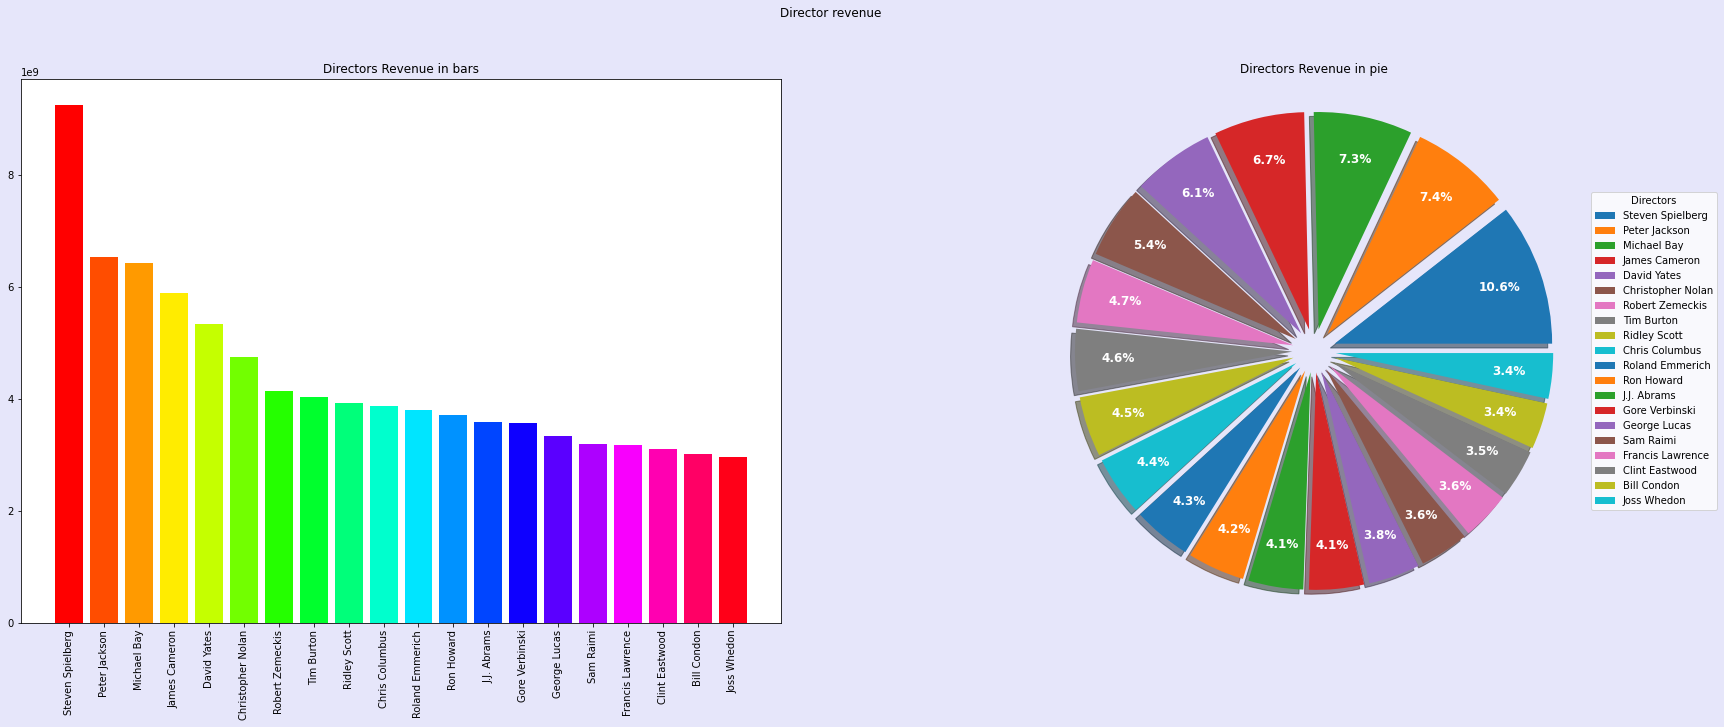

In [367]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(30, 10)
fig.suptitle('Director revenue')
fig.set_facecolor('Lavender')
# Barras
ax[0].set_title("Directors Revenue in bars")
ax[0].bar(revenue_director[0:20].index, revenue_director[0:20], color = colors)
ax[0].set_xticks(revenue_director[0:20].index)
ax[0].set_xticklabels(revenue_director[0:20].index, rotation=90)

# Tarta
wedges, texts, autotexts = ax[1].pie(revenue_director[0:20], autopct='%1.1f%%', pctdistance=0.8,
                                  textprops=dict(color="w"), explode=np.repeat(0.1, 20), shadow= True)

ax[1].legend(revenue_director[0:20].index,
          title="Directors",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          facecolor='inherit' )

plt.setp(autotexts, size=12, weight="bold")

ax[1].set_title("Directors Revenue in pie")
plt.show()

In [368]:
revenue_director = revenue_director.map(lambda x : x/revenue_director[0])
director_ratio = dict()
i = 0
for director in revenue_director.index:
    director_ratio[director] = revenue_director[i]
    i+=1
Director_ratio = Dataset[Dataset['director'].notnull()][["id", "director"]]
Director_ratio["director_ratio"] = Director_ratio["director"].apply(lambda x: director_ratio[x])
Dataset = pd.merge(left=Dataset, how = "left", right=Director_ratio[['id', 'director_ratio']], left_on='id', right_on='id')

In [369]:
revenue_actor = Dataset.groupby("actor")["revenue"].sum().sort_values(ascending = False)
y = np.arange(0,20)
colors = cm.hsv(y / float(max(y)))

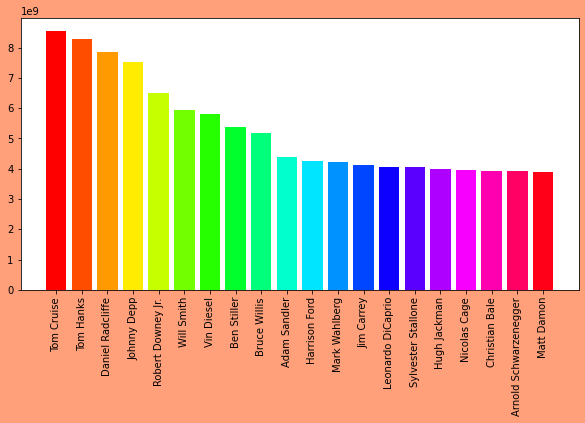

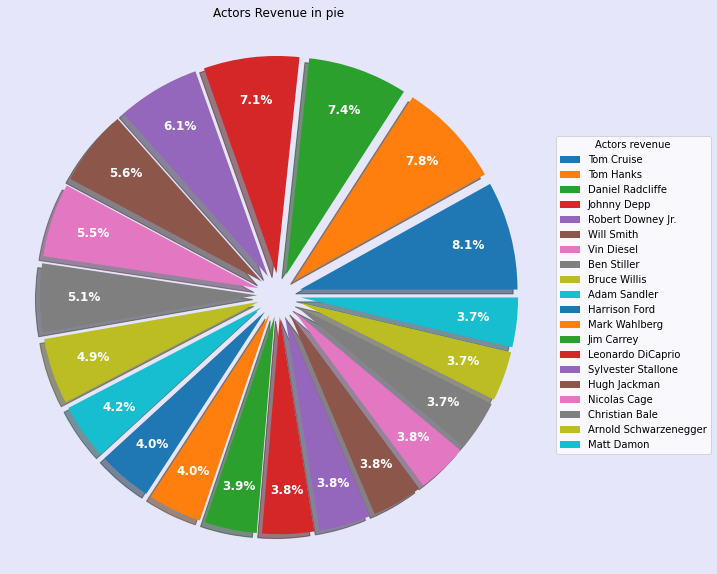

In [370]:
fig1 = plt.figure()
ax1 = plt.axes()
fig1.set_size_inches(10,5)
fig1.set_facecolor('LightSalmon')
ax1.bar(revenue_actor[0:20].index, revenue_actor[0:20], color=colors)
ax1.set_xticks(revenue_actor[0:20].index)
ax1.set_xticklabels(revenue_actor[0:20].index, rotation=90)

fig2 = plt.figure()
ax2 = plt.axes()
fig2.set_size_inches(15,10)
fig2.set_facecolor('Lavender')
wedges, texts, autotexts = ax2.pie(revenue_actor[0:20], autopct='%1.1f%%', pctdistance=0.8,
                                  textprops=dict(color="w"), explode=np.repeat(0.1, 20), shadow= True)

ax2.legend(revenue_actor[0:20].index,
          title="Actors revenue",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          facecolor='inherit' )

plt.setp(autotexts, size=12, weight="bold")

ax2.set_title("Actors Revenue in pie")


plt.show()

In [371]:
revenue_actor = revenue_actor.map(lambda x : x/revenue_actor[0])
actor_ratio = dict()
i = 0
for actor in revenue_actor.index:
    actor_ratio[actor] = revenue_actor[i]
    i+=1
Actor_ratio = Dataset[Dataset['actor'].notnull()][["id", "actor"]]
Actor_ratio["actor_ratio"] = Actor_ratio["actor"].apply(lambda x: actor_ratio[x])
Dataset = pd.merge(left=Dataset, how = "left", right=Actor_ratio[['id', 'actor_ratio']], left_on='id', right_on='id')

In [372]:
# Pasamos las columnas noméricas a float para que se pueda operar con ellas sin problemas
Dataset["popularity"] = Dataset["popularity"].astype(float)
Dataset["budget"] = Dataset["budget"].astype(float)
Dataset["revenue"] = Dataset["revenue"].astype(float)
Dataset["vote_average"] = Dataset["vote_average"].astype(float)
Dataset["vote_count"] = Dataset["vote_count"].astype(float)
Dataset["rating"] = Dataset["rating"].astype(float)
Dataset['release_date'] = Dataset['release_date'].astype(float)

In [373]:
Dataset['return'] = Dataset['revenue'] - Dataset['budget']

Text(0.5, 1.0, 'Films return')

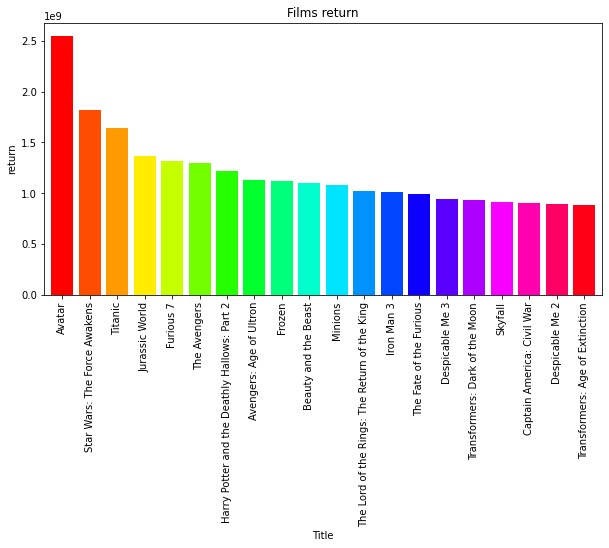

In [374]:
y = np.arange(0,20)
colors = cm.hsv(y / float(max(y)))
return_films = Dataset.loc[:,["title", "return"]].sort_values(by = "return", ascending=False)[0:20]
return_films = return_films.set_index("title")
plt.figure(figsize = (10, 5)) 
pd.Series(return_films["return"]).plot.bar(color = colors , width = 0.8)
plt.xlabel('Title')
plt.ylabel('return')
plt.title('Films return')

Text(0.5, 1.0, 'Films votes')

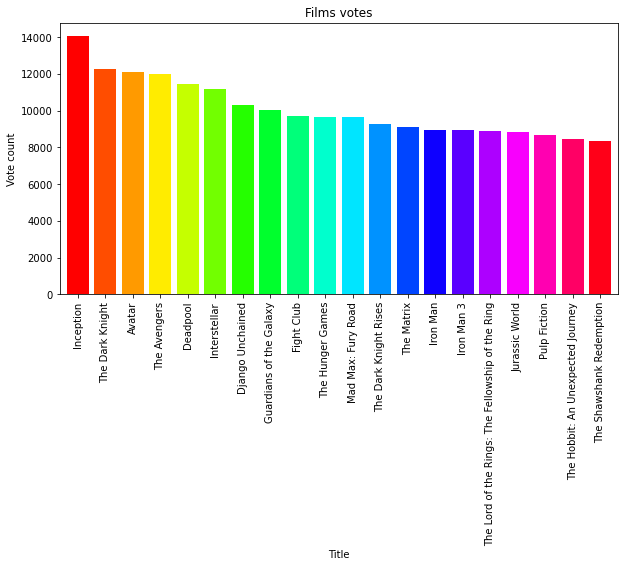

In [375]:
y = np.arange(0,20)
colors = cm.hsv(y / float(max(y)))
vote_count = Dataset.loc[:,["title", "vote_count"]].sort_values(by = "vote_count", ascending=False)[0:20]
vote_count = vote_count.set_index("title")
plt.figure(figsize = (10, 5)) 
pd.Series(vote_count["vote_count"]).plot.bar(color = colors , width = 0.8)
plt.xlabel('Title')
plt.ylabel('Vote count')
plt.title('Films votes')

In [376]:
revenue_genres = Dataset.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
revenue_genres.name = "genre"

Text(0.5, 1.0, 'Genres revenue')

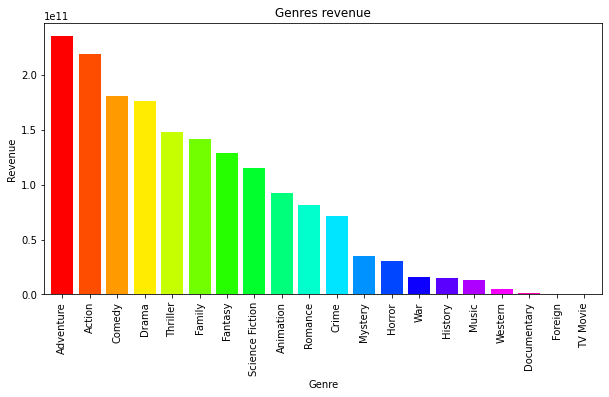

In [377]:
y = np.arange(0,20)
colors = cm.hsv(y / float(max(y)))
revenue_genres = Dataset.join(revenue_genres)[["genre", "revenue"]].groupby("genre")["revenue"].sum().sort_values(ascending = False)
plt.figure(figsize = (10, 5)) 
revenue_genres.plot.bar(color = colors , width = 0.8)
plt.xlabel('Genre')
plt.ylabel('Revenue')
plt.title('Genres revenue')

In [378]:
# Catalogamos a cada pelicula su primer género
Dataset["genre"] = Dataset["genres"].apply(lambda x: x[0] if x else np.nan)
return_max = max(Dataset["return"])
Dataset["return_ratio"] = Dataset["return"].apply(lambda x: x/return_max)
revenue_genres = revenue_genres.map(lambda x : x/revenue_genres[0])
genre_ratio = dict()
i = 0
for genre in revenue_genres.index:
    genre_ratio[genre] = revenue_genres[i]
    i+=1
genre_ratio = dict()
i = 0
for genre in revenue_genres.index:
    genre_ratio[genre] = revenue_genres[i]
    i+=1
Dataset["genre_ratio"] = 0
# A las peliculas que no disponen de genero se catalogan con el que menos ratio tiene.
Dataset["genres"] = Dataset["genres"].apply(lambda x: False if not x else x).apply(lambda x: ['TV Movie'] if not x else x)
Dataset['genre_ratio'] = Dataset['genres'].apply(lambda x: max([genre_ratio[genre] for genre in x]))
# Catalogamos la pelicula con el género que tiene un ratio más alto de entre los que dispone.
Dataset['genres'] = Dataset['genre_ratio'].apply(lambda x: list(genre_ratio.keys())[list(genre_ratio.values()).index(x)])

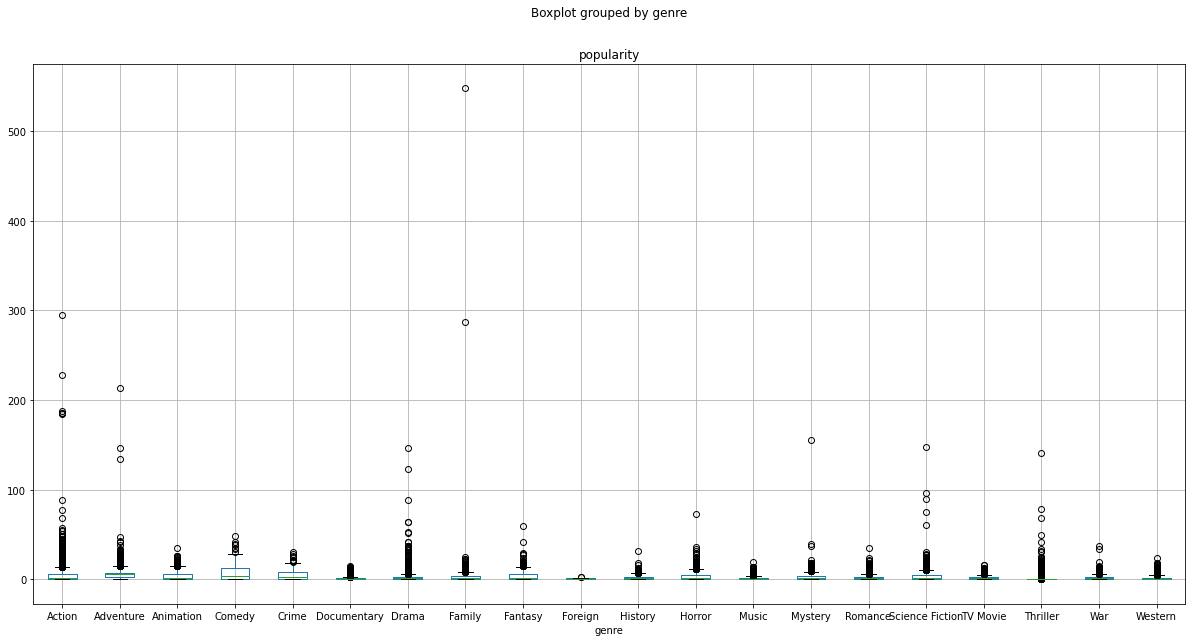

In [379]:
Dataset.boxplot('popularity', 'genre', showfliers=True, figsize = (20,10))
plt.show()

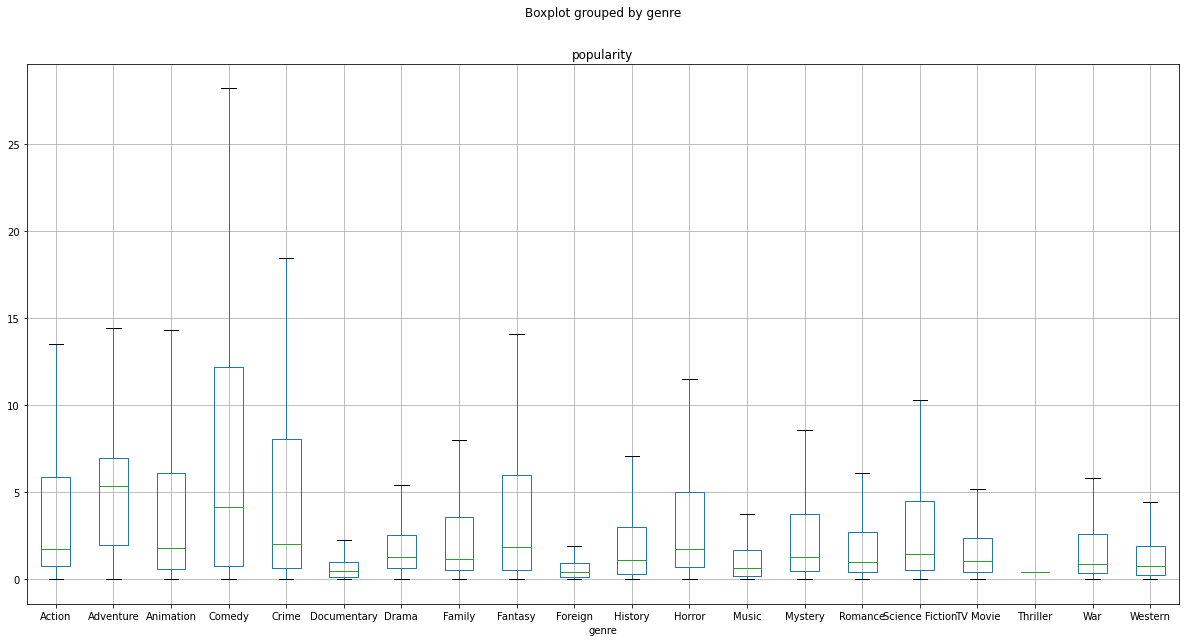

In [380]:
Dataset.boxplot('popularity', 'genre', showfliers=False, figsize = (20,10))
plt.ticklabel_format(style="plain", axis="y")# quita la notación cientifica
plt.show()

<Figure size 1296x576 with 0 Axes>

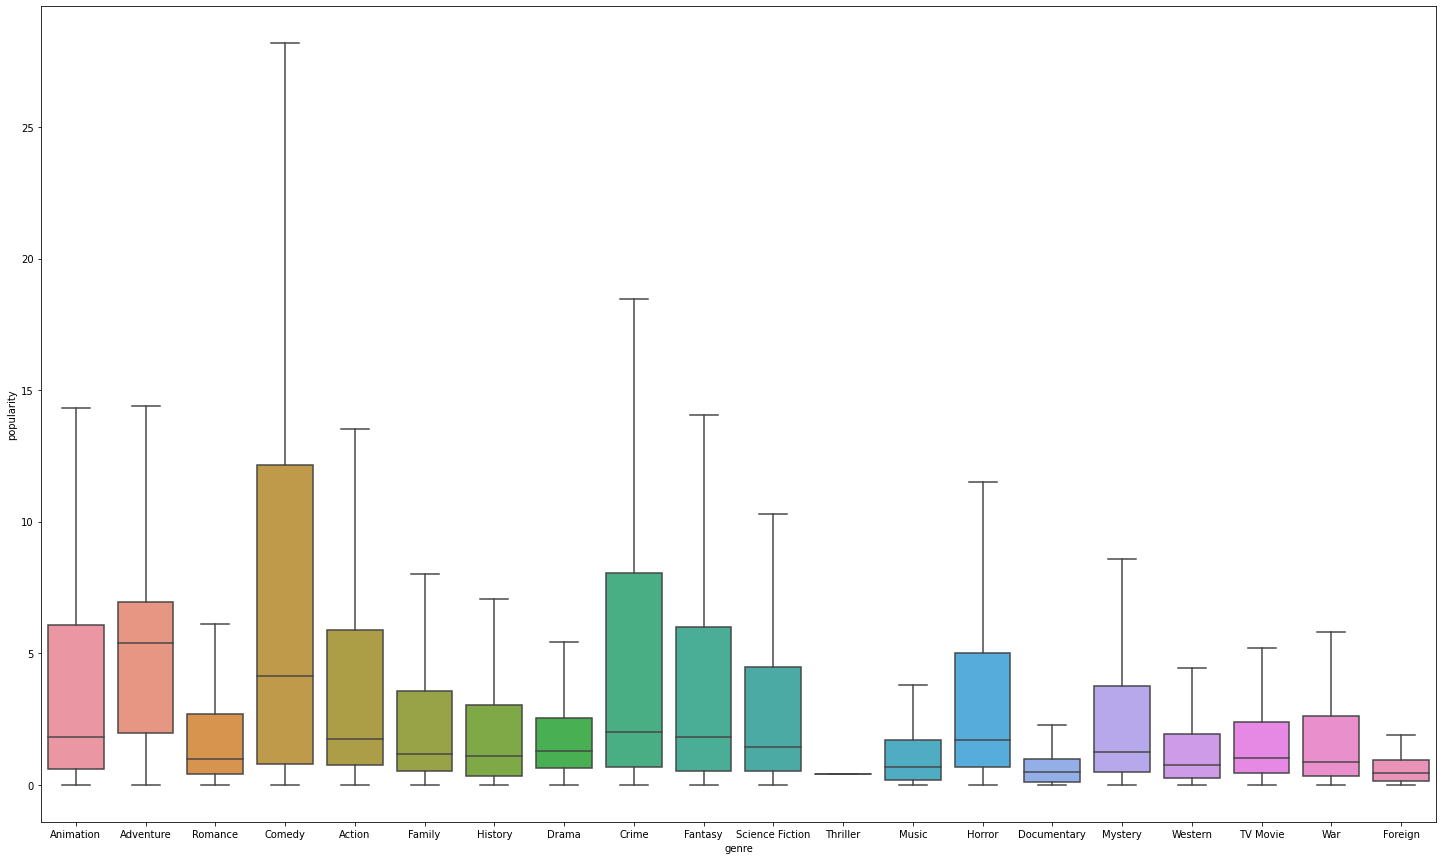

In [381]:
plt.figure(figsize=(18,8))
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(25, 15))
sns.boxplot(x='genre', y='popularity', data=Dataset, ax =ax, showfliers=False)
plt.show()

In [382]:
if False or not os.path.exists('Dataset.pickle'):
    pickle_file = open('Dataset.pickle', 'wb')
    pickle.dump(Dataset, pickle_file)
    pickle_file.close()

In [383]:
extract_data = open('Dataset.pickle', 'rb')
Dataset = pickle.load(extract_data)

# Análisis Exploratorio de datos

In [384]:
# Missing data:

total = Dataset.isnull().sum().sort_values(ascending = False)
percent = (Dataset.isnull().sum() / Dataset.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
belongs_to_collection,73051,0.932391
rating,65893,0.841030
actor_ratio,2804,0.035789
actor,2804,0.035789
genre,2457,0.031360
director_ratio,888,0.011334
director,888,0.011334
runtime,257,0.003280
status,81,0.001034
imdb_id,17,0.000217


In [385]:
# Tratamiento de datos faltantes:

Dataset = Dataset.drop((missing_data[missing_data['Total'] > 50]).index,1)


In [386]:
len(Dataset)

78348

In [387]:
Dataset.columns

Index(['adult', 'budget', 'id', 'imdb_id', 'original_language',
       'original_title', 'popularity', 'release_date', 'revenue', 'title',
       'vote_average', 'vote_count', 'genres', 'production_companies',
       'production_countries', 'spoken_languages', 'return', 'return_ratio',
       'genre_ratio'],
      dtype='object')

In [388]:
Dataset = Dataset.reindex(columns = ['id', 'adult', 'budget', 'imdb_id', 'original_title', 
                                     'popularity', 'release_date', 'title', 'vote_average', 'vote_count', 
                                     'genres', 'production_companies', 'production_countries', 'spoken_languages', 
                                     'return', 'return_ratio', 'genre_ratio', 'revenue'])

In [389]:
Dataset.head(5)

,id,adult,budget,imdb_id,original_title,popularity,release_date,title,vote_average,vote_count,genres,production_companies,production_countries,spoken_languages,return,return_ratio,genre_ratio,revenue
0,862,False,30000000.0,tt0114709,Toy Story,21.946943,1995.0,Toy Story,7.7,5415.0,Comedy,[Pixar Animation Studios],[United States of America],[English],343554033.0,0.134676,0.766793,373554033.0
1,8844,False,65000000.0,tt0113497,Jumanji,17.015539,1995.0,Jumanji,6.9,2413.0,Adventure,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],"[English, Français]",197797249.0,0.077538,1.000000,262797249.0
2,15602,False,0.0,tt0113228,Grumpier Old Men,11.712900,1995.0,Grumpier Old Men,6.5,92.0,Comedy,"[Warner Bros., Lancaster Gate]",[United States of America],[English],0.0,0.000000,0.766793,0.0
3,31357,False,16000000.0,tt0114885,Waiting to Exhale,3.859495,1995.0,Waiting to Exhale,6.1,34.0,Comedy,[Twentieth Century Fox Film Corporation],[United States of America],[English],65452156.0,0.025658,0.766793,81452156.0
4,11862,False,0.0,tt0113041,Father of the Bride Part II,8.387519,1995.0,Father of the Bride Part II,5.7,173.0,Comedy,"[Sandollar Productions, Touchstone Pictures]",[United States of America],[English],76578911.0,0.030020,0.766793,76578911.0


In [390]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78348 entries, 0 to 78347
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    78348 non-null  int32  
 1   adult                 78348 non-null  object 
 2   budget                78348 non-null  float64
 3   imdb_id               78331 non-null  object 
 4   original_title        78348 non-null  object 
 5   popularity            78348 non-null  float64
 6   release_date          78348 non-null  float64
 7   title                 78348 non-null  object 
 8   vote_average          78348 non-null  float64
 9   vote_count            78348 non-null  float64
 10  genres                78348 non-null  object 
 11  production_companies  78348 non-null  object 
 12  production_countries  78348 non-null  object 
 13  spoken_languages      78348 non-null  object 
 14  return                78348 non-null  float64
 15  return_ratio       

Análisis univariable (Variable objetivo)

In [391]:
Dataset['revenue'].describe()

count    7.834800e+04
mean     7.140128e+06
std      4.949340e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.787965e+09
Name: revenue, dtype: float64

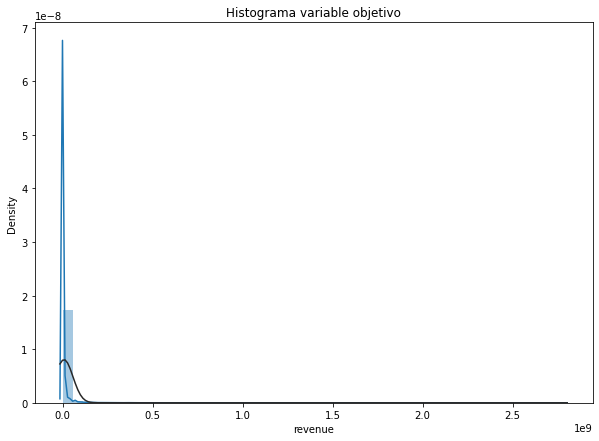

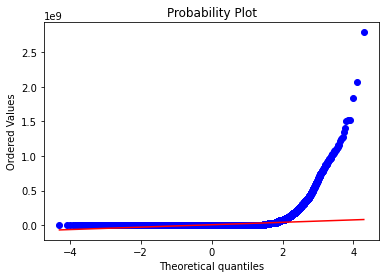

In [392]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 7)
ax.set_title('Histograma variable objetivo')
# sns.distplot(Dataset['revenue'], fit = norm)
sns.distplot(Dataset[Dataset['revenue'].notnull()]['revenue'], fit = norm)
fig = plt.figure()
res = stats.probplot(Dataset['revenue'], plot = plt)

Calculating the Z-score we re-scale and center the data and look for data points which are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.

In [393]:
# Eliminamos los outlayers de la variable objetivo
z = np.abs(stats.zscore(Dataset['revenue']))
Dataset_sin_outlayers = Dataset[z < 3]
# Dataset_sin_outlayers = Dataset
print('El número de outlayers eliminado ha sido de:' , (len(Dataset) - len(Dataset_sin_outlayers)))

El número de outlayers eliminado ha sido de: 903


In [394]:
Dataset_sin_outlayers = Dataset_sin_outlayers.reset_index(drop=True)

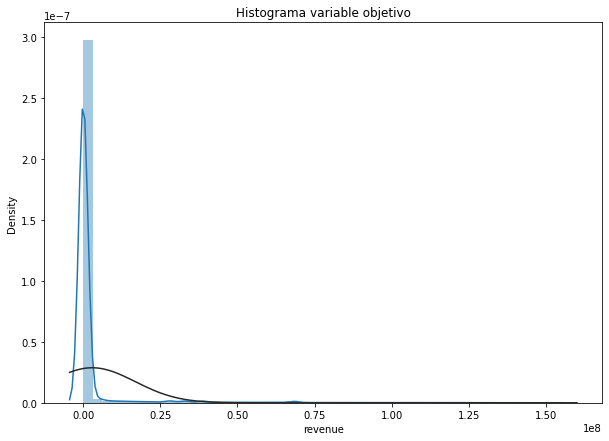

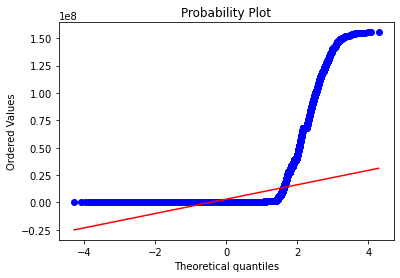

In [395]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 7)
ax.set_title('Histograma variable objetivo')
# sns.distplot(Dataset['revenue'], fit = norm)
sns.distplot(Dataset_sin_outlayers[Dataset_sin_outlayers['revenue'].notnull()]['revenue'], fit = norm)
fig = plt.figure()
res = stats.probplot(Dataset_sin_outlayers['revenue'], plot = plt)

<AxesSubplot:title={'center':'Scatterplot Revenue VS Budget'}, xlabel='Budget', ylabel='Revenue'>

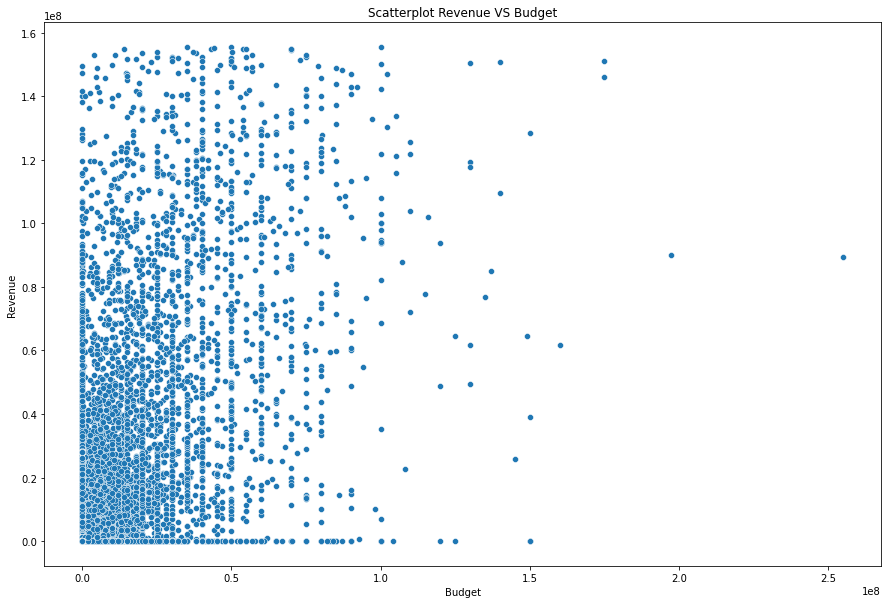

In [396]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title('Scatterplot Revenue VS Budget')
ax.set_xlabel('Budget')
ax.set_ylabel('Revenue')
sns.scatterplot(data=Dataset_sin_outlayers, x="budget", y="revenue")

<AxesSubplot:title={'center':'Scatterplot Revenue VS Popularity'}, xlabel='Popularity', ylabel='Revenue'>

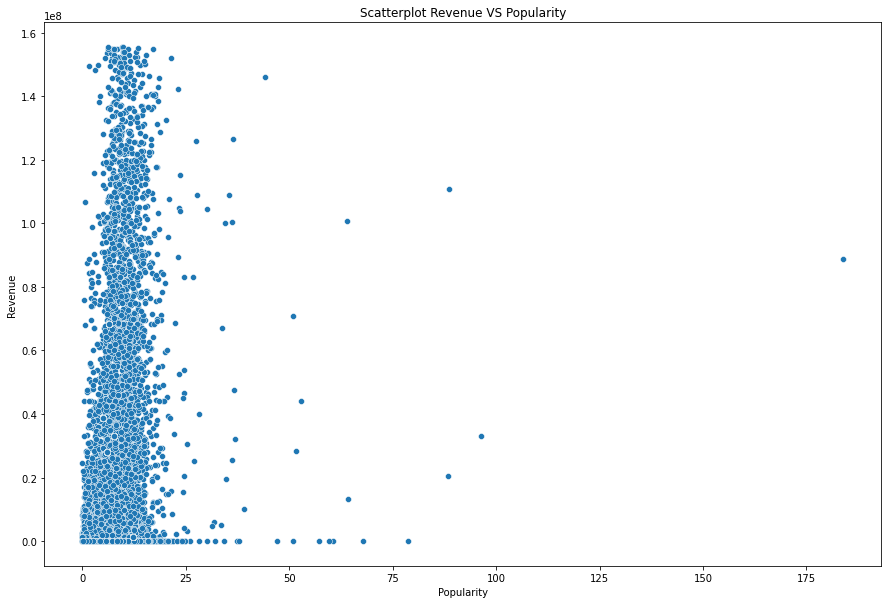

In [397]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title('Scatterplot Revenue VS Popularity')
ax.set_xlabel('Popularity')
ax.set_ylabel('Revenue')
sns.scatterplot(data=Dataset_sin_outlayers, x="popularity", y="revenue")

<AxesSubplot:title={'center':'Scatterplot Revenue VS Release_date'}, xlabel='Release_date', ylabel='Revenue'>

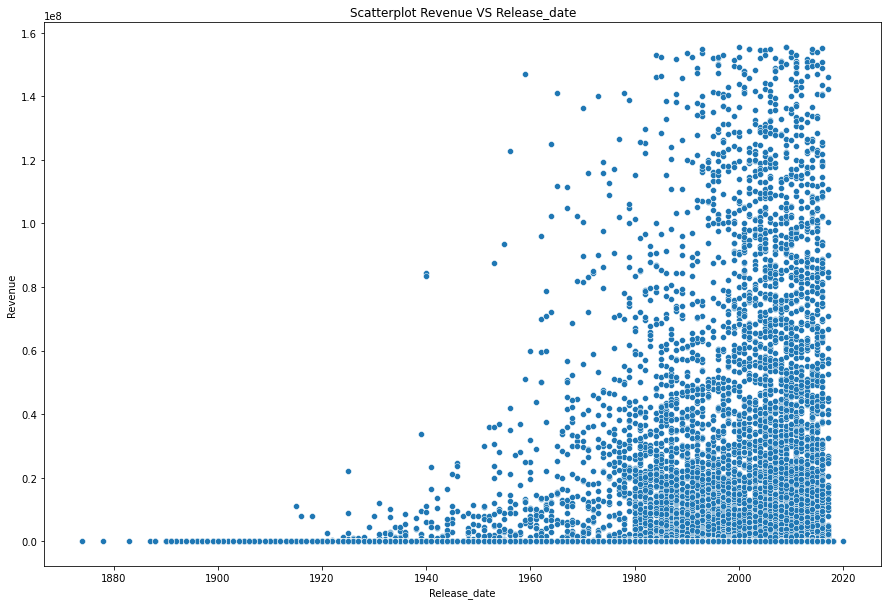

In [398]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title('Scatterplot Revenue VS Release_date')
ax.set_xlabel('Release_date')
ax.set_ylabel('Revenue')
sns.scatterplot(data=Dataset_sin_outlayers, x="release_date", y="revenue")

<AxesSubplot:title={'center':'Scatterplot Revenue VS Vote_average'}, xlabel='Vote_average', ylabel='Revenue'>

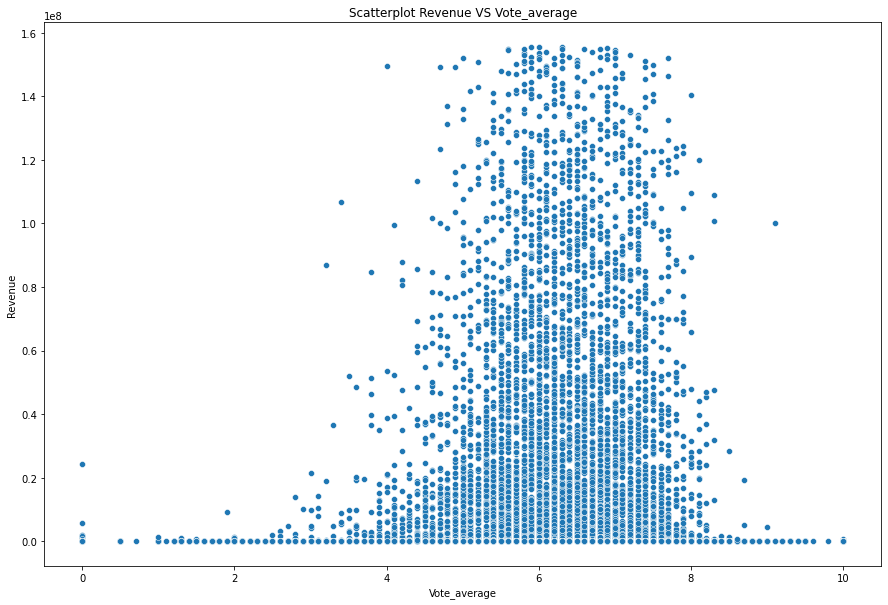

In [399]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title('Scatterplot Revenue VS Vote_average')
ax.set_xlabel('Vote_average')
ax.set_ylabel('Revenue')
sns.scatterplot(data=Dataset_sin_outlayers, x="vote_average", y="revenue")

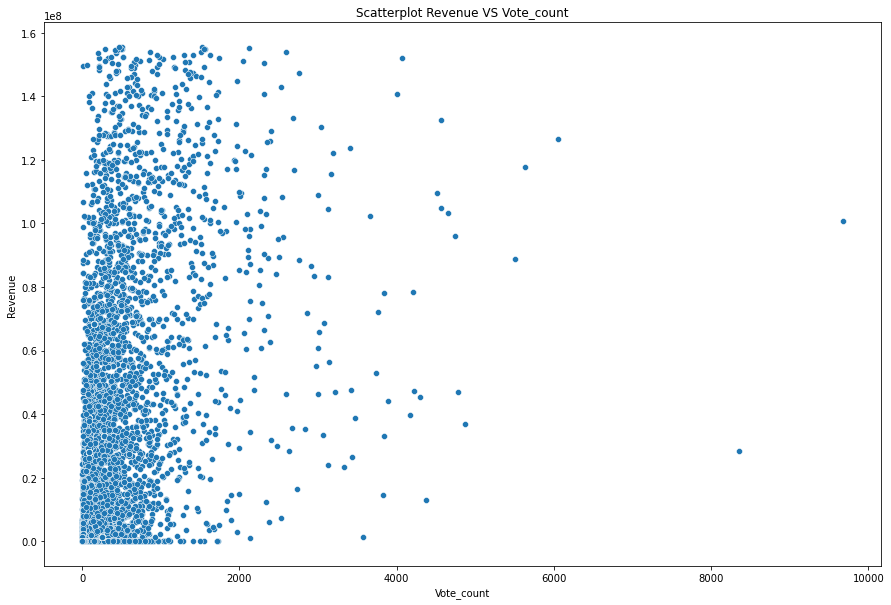

In [400]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title('Scatterplot Revenue VS Vote_count')
ax.set_xlabel('Vote_count')
ax.set_ylabel('Revenue')
sns.scatterplot(data=Dataset_sin_outlayers, x="vote_count", y="revenue")
plt.show()

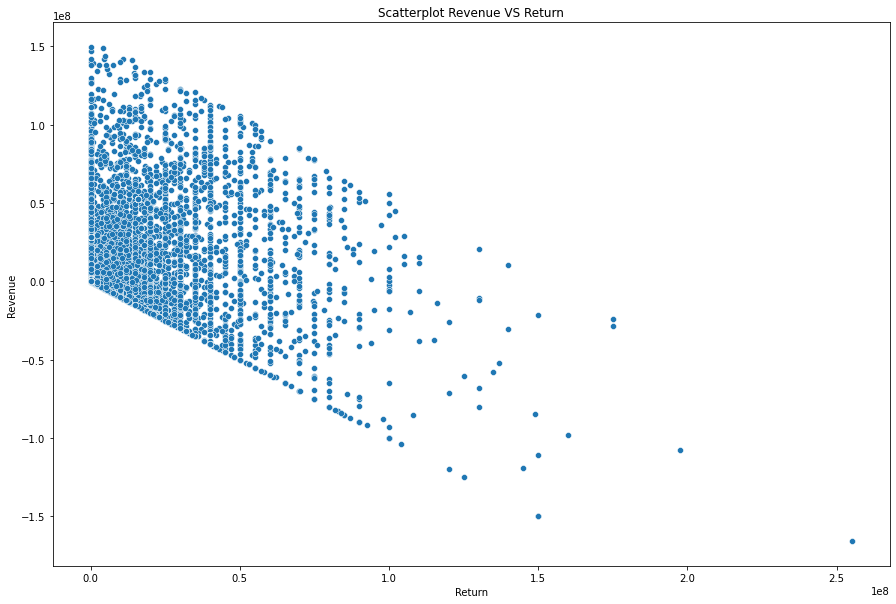

In [401]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title('Scatterplot Revenue VS Return')
ax.set_xlabel('Return')
ax.set_ylabel('Revenue')
sns.scatterplot(data=Dataset_sin_outlayers, x="budget", y="return")
plt.show()

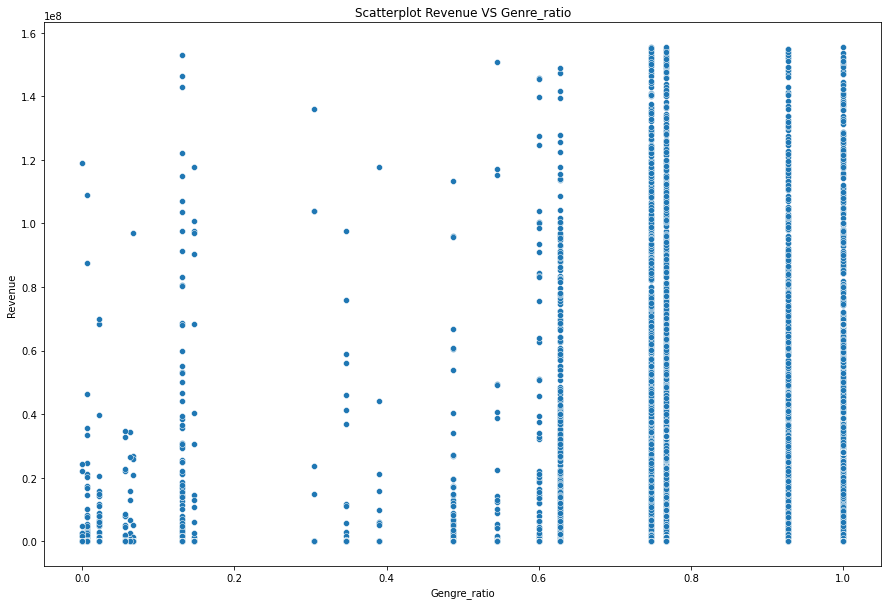

In [402]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title('Scatterplot Revenue VS Genre_ratio')
ax.set_xlabel('Gengre_ratio')
ax.set_ylabel('Revenue')
sns.scatterplot(data=Dataset_sin_outlayers, x="genre_ratio", y="revenue")
plt.show()

In [403]:
Dataset_sin_outlayers.columns

Index(['id', 'adult', 'budget', 'imdb_id', 'original_title', 'popularity',
       'release_date', 'title', 'vote_average', 'vote_count', 'genres',
       'production_companies', 'production_countries', 'spoken_languages',
       'return', 'return_ratio', 'genre_ratio', 'revenue'],
      dtype='object')

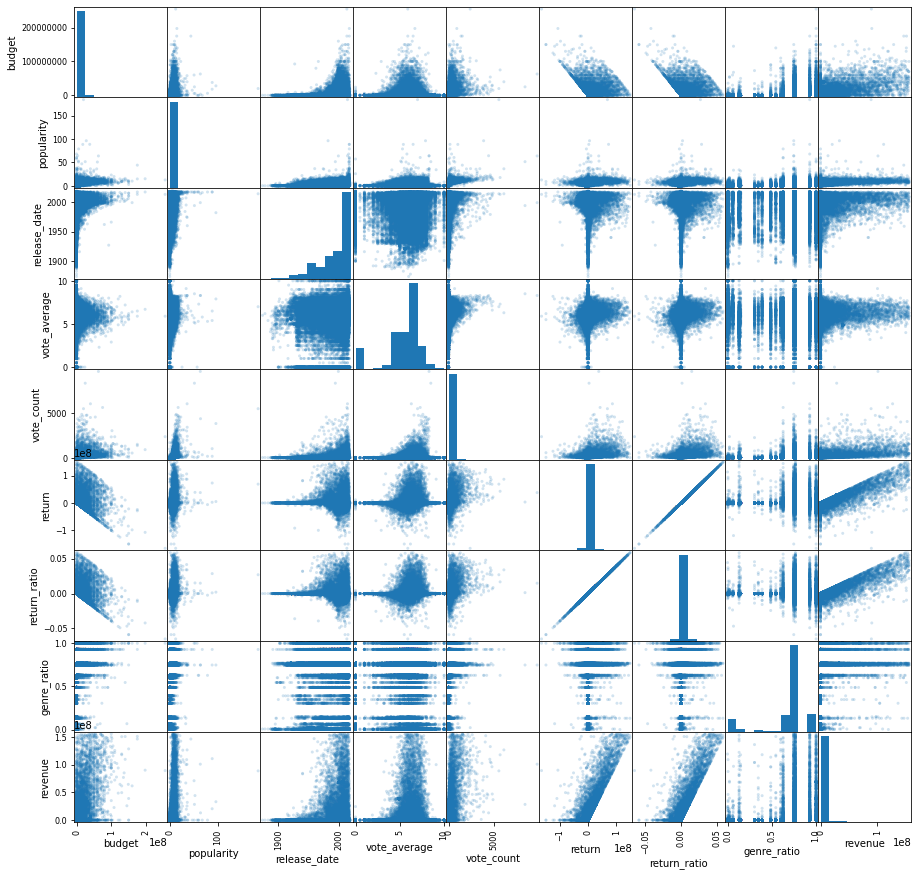

In [404]:
pd.plotting.scatter_matrix(Dataset_sin_outlayers.loc[:,['adult', 'budget', 'popularity', 'release_date', 'vote_average', 'vote_count', 'return', 'return_ratio', 'genre_ratio', 'revenue']], alpha=0.2, figsize=(15, 15))
plt.show()

In [405]:
# len(Dataset[pd.isna(Dataset["actor"])].index.tolist())

In [406]:
# Dataset[pd.isna(Dataset["actor"])]
# index = Dataset[pd.isna(Dataset["actor"])].index.tolist()
# Dataset = Dataset.drop(index, axis = 0) 
# Dataset = Dataset.reset_index(drop=True)

In [407]:
# len(Dataset[pd.isna(Dataset["actor"])].index.tolist())

ADECUACIÓN DEL DATASET

In [408]:
# #Eliminación de variables no útiles
Dataset = Dataset_sin_outlayers.drop(columns=['id', 'imdb_id', 'original_title', 'title', 'production_countries', 'spoken_languages', 'production_companies'])

In [409]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77445 entries, 0 to 77444
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   adult         77445 non-null  object 
 1   budget        77445 non-null  float64
 2   popularity    77445 non-null  float64
 3   release_date  77445 non-null  float64
 4   vote_average  77445 non-null  float64
 5   vote_count    77445 non-null  float64
 6   genres        77445 non-null  object 
 7   return        77445 non-null  float64
 8   return_ratio  77445 non-null  float64
 9   genre_ratio   77445 non-null  float64
 10  revenue       77445 non-null  float64
dtypes: float64(9), object(2)
memory usage: 6.5+ MB


In [410]:
#Rellenamos valores NaN
# Dataset['runtime'] =  Dataset['runtime'].fillna(np.mean(Dataset['runtime']))
# Dataset['rating'] =  Dataset['rating'].fillna(np.mean(Dataset['rating']))

In [411]:
Dataset[0:5]

,adult,budget,popularity,release_date,vote_average,vote_count,genres,return,return_ratio,genre_ratio,revenue
0,False,0.0,11.712900,1995.0,6.5,92.0,Comedy,0.0,0.000000,0.766793,0.0
1,False,16000000.0,3.859495,1995.0,6.1,34.0,Comedy,65452156.0,0.025658,0.766793,81452156.0
2,False,0.0,8.387519,1995.0,5.7,173.0,Comedy,76578911.0,0.030020,0.766793,76578911.0
3,False,58000000.0,6.677277,1995.0,6.2,141.0,Comedy,-58000000.0,-0.022736,0.766793,0.0
4,False,0.0,2.561161,1995.0,5.4,45.0,Adventure,0.0,0.000000,1.000000,0.0


In [412]:
# if False or not os.path.exists('Dataset_v0.pickle'):
#     pickle_file = open('Dataset_v0.pickle', 'wb')
#     pickle.dump(Dataset, pickle_file)
#     pickle_file.close()

In [413]:
# extract_data = open('Dataset_v0.pickle', 'rb')
# Dataset = pickle.load(extract_data)

In [414]:
Dataset_cat = Dataset[['adult', 'genres', ]]
Dataset_num = Dataset.drop(columns = ['adult', 'genres'])
scaler = StandardScaler().fit(Dataset_num)
Dataset_num_norm = scaler.transform(Dataset_num)
Dataset_num_norm = pd.DataFrame(Dataset_num_norm, columns= Dataset_num.columns)

In [415]:
Dummies = pd.get_dummies(Dataset[['adult', 'genres']], prefix = ['adult_dummie', 'genres_dummie'])

In [416]:
Dataset_num_norm.head(5)

,budget,popularity,release_date,vote_average,vote_count,return,return_ratio,genre_ratio,revenue
0,-0.233838,2.321241,0.069263,0.519175,0.182907,-0.094956,-0.094956,0.339379,-0.214315
1,1.686326,0.284280,0.069263,0.327529,-0.133527,5.977629,5.977629,0.339379,5.659408
2,-0.233838,1.458727,0.069263,0.135883,0.624822,7.009958,7.009958,0.339379,5.307986
3,6.726757,1.015136,0.069263,0.375441,0.450238,-5.476138,-5.476138,0.339379,-0.214315
4,-0.233838,-0.052473,0.069263,-0.007851,-0.073513,-0.094956,-0.094956,1.288040,-0.214315


In [417]:
Dataset_model = pd.concat([Dataset_num_norm, Dummies], axis = 1)

In [418]:
Dataset_model.head(5)

,budget,popularity,release_date,vote_average,vote_count,return,return_ratio,genre_ratio,revenue,adult_dummie_False,adult_dummie_True,genres_dummie_Action,genres_dummie_Adventure,genres_dummie_Animation,genres_dummie_Comedy,genres_dummie_Crime,genres_dummie_Documentary,genres_dummie_Drama,genres_dummie_Family,genres_dummie_Fantasy,genres_dummie_Foreign,genres_dummie_History,genres_dummie_Horror,genres_dummie_Music,genres_dummie_Mystery,genres_dummie_Romance,genres_dummie_Science Fiction,genres_dummie_TV Movie,genres_dummie_Thriller,genres_dummie_War,genres_dummie_Western
0,-0.233838,2.321241,0.069263,0.519175,0.182907,-0.094956,-0.094956,0.339379,-0.214315,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.686326,0.284280,0.069263,0.327529,-0.133527,5.977629,5.977629,0.339379,5.659408,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-0.233838,1.458727,0.069263,0.135883,0.624822,7.009958,7.009958,0.339379,5.307986,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6.726757,1.015136,0.069263,0.375441,0.450238,-5.476138,-5.476138,0.339379,-0.214315,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-0.233838,-0.052473,0.069263,-0.007851,-0.073513,-0.094956,-0.094956,1.288040,-0.214315,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


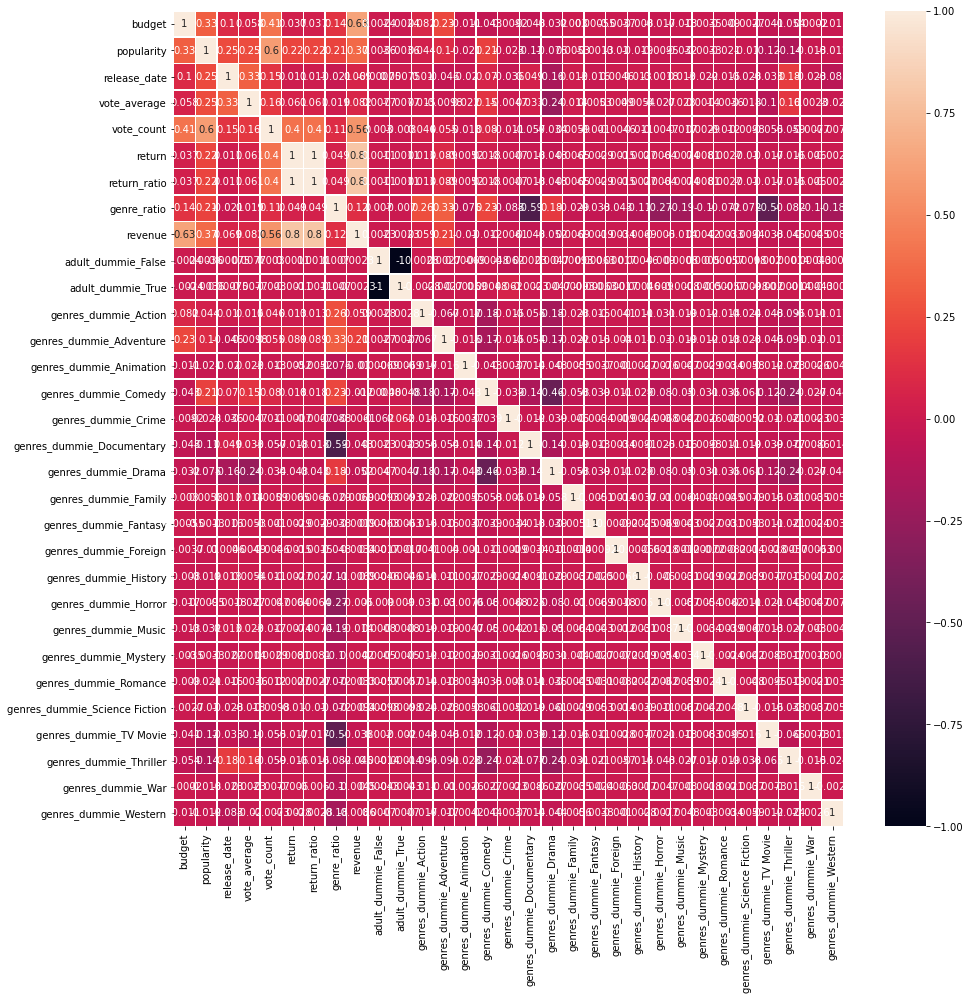

In [419]:
fig, ax = plt.subplots(figsize=(15,15))
corr = Dataset_model.corr()
sns.heatmap(corr,annot=True,linewidths=.5,annot_kws={"fontsize":10})
plt.show()

In [420]:
# corr = Dataset.corr()
corr[['revenue']].sort_values(by = 'revenue',ascending = False)\
                                .style.background_gradient()

,revenue
revenue,1.000000
return_ratio,0.799648
return,0.799648
budget,0.629857
vote_count,0.555571
popularity,0.369869
genres_dummie_Adventure,0.206985
genre_ratio,0.124156
vote_average,0.082308
release_date,0.069207


In [421]:
from sklearn.linear_model import LinearRegression

def calculateVIF(data):
    features = list(data.columns)
    num_features = len(features)
    
    model = LinearRegression()
    
    result = pd.DataFrame(index = ['VIF'], columns = features)
    result = result.fillna(0)
    
    for ite in range(num_features):
        x_features = features[:]
        y_featue = features[ite]
        x_features.remove(y_featue)
        
        x = data[x_features]
        y = data[y_featue]
        
        model.fit(data[x_features], data[y_featue])
        
        result[y_featue] = 1/(1 - model.score(data[x_features], data[y_featue]))
    
    return result

def selectDataUsingVIF(data, max_VIF = 5):
    result = data.copy(deep = True)
    
    VIF = calculateVIF(result)
    
    while VIF.to_numpy().max() > max_VIF:
        col_max = np.where(VIF == VIF.to_numpy().max())[1][0]
        features = list(result.columns)
        features.remove(features[col_max])
        result = result[features]
        
        VIF = calculateVIF(result)
        
    return result

In [422]:
calculateVIF(Dataset_model)
model_vars = selectDataUsingVIF(Dataset_model)
calculateVIF(model_vars) # Vemos que se quitan 7 variables

,popularity,release_date,vote_average,vote_count,return_ratio,revenue,adult_dummie_True,genres_dummie_Adventure,genres_dummie_Animation,genres_dummie_Comedy,genres_dummie_Crime,genres_dummie_Documentary,genres_dummie_Drama,genres_dummie_Family,genres_dummie_Fantasy,genres_dummie_Foreign,genres_dummie_History,genres_dummie_Horror,genres_dummie_Music,genres_dummie_Mystery,genres_dummie_Romance,genres_dummie_Science Fiction,genres_dummie_TV Movie,genres_dummie_Thriller,genres_dummie_War,genres_dummie_Western
VIF,1.831267,1.229096,1.24539,1.980727,2.905797,3.689108,1.004102,1.858827,1.061633,4.068333,1.053733,1.639919,4.08646,1.107476,1.049895,1.003858,1.027353,1.199984,1.081962,1.031329,1.041085,1.120047,1.476619,2.574074,1.024345,1.069537


In [423]:
filtro = Dataset_model.columns.isin(model_vars.columns)==False
print("Las variables excluidas del modelo son :", list(Dataset_model.columns[filtro]))
print("Las variables que se usarán en el modelo son:", list(model_vars.columns))

Las variables excluidas del modelo son : ['budget', 'return', 'genre_ratio', 'adult_dummie_False', 'genres_dummie_Action']
Las variables que se usarán en el modelo son: ['popularity', 'release_date', 'vote_average', 'vote_count', 'return_ratio', 'revenue', 'adult_dummie_True', 'genres_dummie_Adventure', 'genres_dummie_Animation', 'genres_dummie_Comedy', 'genres_dummie_Crime', 'genres_dummie_Documentary', 'genres_dummie_Drama', 'genres_dummie_Family', 'genres_dummie_Fantasy', 'genres_dummie_Foreign', 'genres_dummie_History', 'genres_dummie_Horror', 'genres_dummie_Music', 'genres_dummie_Mystery', 'genres_dummie_Romance', 'genres_dummie_Science Fiction', 'genres_dummie_TV Movie', 'genres_dummie_Thriller', 'genres_dummie_War', 'genres_dummie_Western']


In [424]:
# if False or not os.path.exists('Dataset_model_v0.pickle'):
#     pickle_file = open('Dataset_model_v0.pickle', 'wb')
#     pickle.dump(Dataset_model, pickle_file)
#     pickle_file.close()

In [425]:
# extract_data = open('Dataset_model_v0.pickle', 'rb')
# Dataset_model = pickle.load(extract_data)

In [426]:
# features = list(model_vars.drop(columns = ['revenue']).columns)
features = list(model_vars.drop(columns=['revenue']).columns)
x = model_vars[features]
y = model_vars['revenue']

In [427]:
list(x.columns)

['popularity',
 'release_date',
 'vote_average',
 'vote_count',
 'return_ratio',
 'adult_dummie_True',
 'genres_dummie_Adventure',
 'genres_dummie_Animation',
 'genres_dummie_Comedy',
 'genres_dummie_Crime',
 'genres_dummie_Documentary',
 'genres_dummie_Drama',
 'genres_dummie_Family',
 'genres_dummie_Fantasy',
 'genres_dummie_Foreign',
 'genres_dummie_History',
 'genres_dummie_Horror',
 'genres_dummie_Music',
 'genres_dummie_Mystery',
 'genres_dummie_Romance',
 'genres_dummie_Science Fiction',
 'genres_dummie_TV Movie',
 'genres_dummie_Thriller',
 'genres_dummie_War',
 'genres_dummie_Western']

In [428]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [429]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
try:
    model = sm.OLS(y_train.astype(float),x_train.astype(float))
    result = model.fit()
    print (result.summary())
    
except np.linalg.linalg.LinAlgError as err:
    if 'Singular matrix' in err.message:
        print ("MODEL-INVALID (Singular Matrix)")
    else:
        raise
# Predicción del modelo
y_pred = result.predict(x_test)
print('Error cuadrático medio', mean_squared_error(y_pred, y_test))
print('Error absoluto medio', mean_absolute_error(y_pred, y_test))
print('Mediana del error absoluto', median_absolute_error(y_pred, y_test))
print('Porcentaje del error medio', mean_absolute_percentage_error(y_test, y_pred))

                                 OLS Regression Results                                
Dep. Variable:                revenue   R-squared (uncentered):                   0.728
Model:                            OLS   Adj. R-squared (uncentered):              0.728
Method:                 Least Squares   F-statistic:                              5558.
Date:                Mon, 08 Feb 2021   Prob (F-statistic):                        0.00
Time:                        19:32:30   Log-Likelihood:                         -39385.
No. Observations:               51888   AIC:                                  7.882e+04
Df Residuals:                   51863   BIC:                                  7.904e+04
Df Model:                          25                                                  
Covariance Type:            nonrobust                                                  
                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------

Text(0, 0.5, 'Revenue')

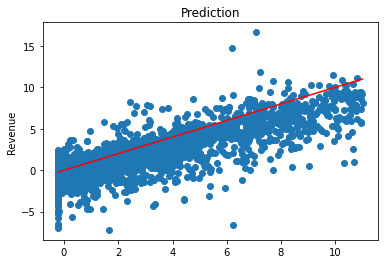

In [430]:
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color = 'r')
plt.scatter(y_train, result.predict(x_train))
plt.title(u'Prediction')
plt.ylabel(u'Revenue')

In [431]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

# Predicción del modelo
y_pred = model.predict(x_test);

print('R^2', model.score(x, y))
print('Error cuadrático medio', mean_squared_error(y_pred, y_test))
print('Error absoluto medio', mean_absolute_error(y_pred, y_test))
print('Mediana del error absoluto', median_absolute_error(y_pred, y_test))
print('Porcentaje del error medio', mean_absolute_percentage_error(y_test, y_pred))

R^2 0.7287355224919536
Error cuadrático medio 0.28215511194253706
Error absoluto medio 0.20303225414622122
Mediana del error absoluto 0.046061193136133466
Porcentaje del error medio 0.8454008472616197


Text(0, 0.5, 'Revenue')

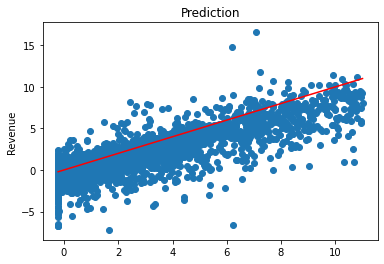

In [432]:
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color = 'r')
plt.scatter(y_train, model.predict(x_train))
plt.title(u'Prediction')
plt.ylabel(u'Revenue')

In [433]:
from sklearn.linear_model import Lasso
from scipy.stats import uniform as sp_rand
from sklearn.model_selection import RandomizedSearchCV

# Creación del modelo
model = Lasso()

param_grid = dict(alpha = sp_rand())

rsearch = RandomizedSearchCV(estimator = model,
                             param_distributions = param_grid,
                             n_iter = 100,
                             cv = 10,
                             random_state = 1)
rsearch.fit(x_train, y_train)

# Los mejores parametros para el modelo
print('El mejor parametro es', rsearch.best_params_)
print('El mejor score es', rsearch.best_score_)

El mejor parametro es {'alpha': 0.00011437481734488664}
El mejor score es 0.7262216963423174


In [434]:
model = Lasso(alpha = rsearch.best_params_['alpha'])
model.fit(x_train, y_train)

# Predicción del modelo
y_pred = model.predict(x_test);

print('R^2', model.score(x, y))
print('Error cuadrático medio', mean_squared_error(y_pred, y_test))
print('Error absoluto medio', mean_absolute_error(y_pred, y_test))
print('Mediana del error absoluto', median_absolute_error(y_pred, y_test))
print('Porcentaje del error medio', mean_absolute_percentage_error(y_test, y_pred))

R^2 0.728637593626202
Error cuadrático medio 0.2822591798571064
Error absoluto medio 0.20275243918130215
Mediana del error absoluto 0.04794571232685679
Porcentaje del error medio 0.8434884321817813


In [435]:
# !pip install xgboost

In [436]:
# gridsearch_params = [
#     (max_depth, min_child_weight)
#     for max_depth in range(9,12)
#     for min_child_weight in range(5,8)
# ]

# params = {
#     # Parameters that we are going to tune.
#     'max_depth':6,
#     'min_child_weight': 1,
#     'eta':.3,
#     'subsample': 1,
#     'colsample_bytree': 1,
#     # Other parameters
#     'objective':'reg:linear',
# }

# num_boost_round = 999

In [437]:
# import xgboost as xgb

# dtrain = xgb.DMatrix(x_train, label=y_train)
# dtest = xgb.DMatrix(x_test, label=y_test)

In [438]:
# # Define initial best params and MAE
# min_mae = float("Inf")
# best_params = None
# for max_depth, min_child_weight in gridsearch_params:
#     print("CV with max_depth={}, min_child_weight={}".format(
#                              max_depth,
#                              min_child_weight))
#     # Update our parameters
#     params['max_depth'] = max_depth
#     params['min_child_weight'] = min_child_weight
#     # Run CV
#     cv_results = xgb.cv(
#         params,
#         dtrain,
#         num_boost_round=num_boost_round,
#         seed=42,
#         nfold=5,
#         metrics={'mae'},
#         early_stopping_rounds=10
#     )
#     # Update best MAE
#     mean_mae = cv_results['test-mae-mean'].min()
#     boost_rounds = cv_results['test-mae-mean'].argmin()
#     print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
#     if mean_mae < min_mae:
#         min_mae = mean_mae
#         best_params = (max_depth,min_child_weight)
# print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

In [439]:
import xgboost as xgb
xgb_regressor = xgb.XGBRegressor(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=9,
    min_child_weight=7
)
model = xgb_regressor.fit(x_train,y_train)
y_pred = model.predict(x_test)

print('R^2', model.score(x, y))
print('Error cuadrático medio', mean_squared_error(y_pred, y_test))
print('Error absoluto medio', mean_absolute_error(y_pred, y_test))
print('Mediana del error absoluto', median_absolute_error(y_pred, y_test))
print('Porcentaje del error medio', mean_absolute_percentage_error(y_test, y_pred))

R^2 0.9629158605254996
Error cuadrático medio 0.09593354491735998
Error absoluto medio 0.05828915603940113
Mediana del error absoluto 0.00012238480719370393
Porcentaje del error medio 0.17728913701074936


Text(0, 0.5, 'Revenue')

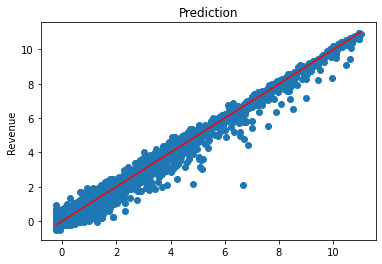

In [440]:
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color = 'r')
plt.scatter(y_train, model.predict(x_train))
plt.title(u'Prediction')
plt.ylabel(u'Revenue')

In [441]:
# n_estimators = [500, 800, 1500, 2500, 5000]
# max_features = ['auto', 'sqrt', 'log2']
# max_depth = [10, 20, 30, 40, 50]
# max_depth.append(None)
# min_samples_split = [2, 5, 10, 15, 20]
# min_samples_leaf = [1, 2, 5, 10, 15]

# grid_param = {'n_estimators': n_estimators,
#              'max_features': max_features,
#              'max_depth': max_depth,
#              'min_samples_split': min_samples_split,
#              'min_samples_leaf': min_samples_leaf}

In [442]:
# from sklearn.model_selection import RandomizedSearchCV

# # Creación del modelo
# RFR = RandomForestRegressor(random_state=1)
# RFR_random = RandomizedSearchCV(estimator = RFR,
#                                param_distributions = grid_param, n_iter = 500,
#                                cv = 5, verbose = 2, random_state = 42,
#                                n_jobs = 1)

# RFR_random.fit(x_train,y_train)

# # Los mejores parametros para el modelo
# print('El mejor parametro es', rsearch.best_params_)
# print('El mejor score es', rsearch.best_score_)

In [443]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import GridSearchCV
# # Create the parameter grid based on the results of random search 
# param_grid = {
#     'bootstrap': [True],
#     'max_depth': [80, 90, 100, 110],
#     'max_features': [2, 3],
#     'min_samples_leaf': [3, 4, 5],
#     'min_samples_split': [8, 10, 12],
#     'n_estimators': [100, 200, 300, 1000]
# }
# # Create a based model
# rf = RandomForestRegressor()
# # Instantiate the grid search model
# grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
#                           cv = 3, n_jobs = -1, verbose = 2)

# # Fit the grid search to the data
# grid_search.fit(x_train,y_train)
# best_grid = grid_search.best_estimator_

In [444]:
# best_grid

In [445]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=500,
                                     criterion='mse',
                                     random_state=1,
                                     n_jobs=1
                                    )
model = rf_regressor.fit(x_train,y_train)
y_pred = model.predict(x_test)

print('R^2', model.score(x, y))
print('Error cuadrático medio', mean_squared_error(y_pred, y_test))
print('Error absoluto medio', mean_absolute_error(y_pred, y_test))
print('Mediana del error absoluto', median_absolute_error(y_pred, y_test))
print('Porcentaje del error medio', mean_absolute_percentage_error(y_test, y_pred)*100)

R^2 0.9628158501236955
Error cuadrático medio 0.08813401821341915
Error absoluto medio 0.05647609116190259
Mediana del error absoluto 1.539603999844985e-10
Porcentaje del error medio 17.976986126577607


Text(0, 0.5, 'Revenue')

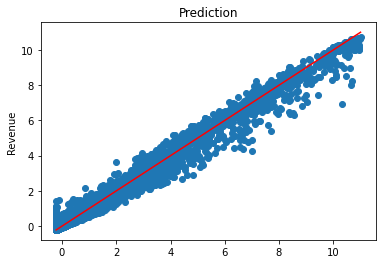

In [446]:
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color = 'r')
plt.scatter(y_train, model.predict(x_train))
plt.title(u'Prediction')
plt.ylabel(u'Revenue')

El modelo XGBOOST tiene un menor error

# Sistema de recomendaciones basado en contenido

In [447]:
metadata = metadata[['id', 'title', 'genres']]
metadata[0:5]

,id,title,genres
0,862,Toy Story,"[Animation, Comedy, Family]"
1,8844,Jumanji,"[Adventure, Fantasy, Family]"
2,15602,Grumpier Old Men,"[Romance, Comedy]"
3,31357,Waiting to Exhale,"[Comedy, Drama, Romance]"
4,11862,Father of the Bride Part II,[Comedy]


In [448]:
Genres_df = metadata.copy()

for index in range(len(metadata)):
    for genre in metadata['genres'][index]:
        if genre in Genres_df:
            Genres_df[genre][index] = 1
        else:  
            Genres_df[genre] = 0
            Genres_df[genre][index] = 1

In [449]:
Genres_df.head()

,id,title,genres,Animation,Comedy,Family,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,History,Science Fiction,Mystery,War,Foreign,Music,Documentary,Western,TV Movie
0,862,Toy Story,"[Animation, Comedy, Family]",1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8844,Jumanji,"[Adventure, Fantasy, Family]",0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,15602,Grumpier Old Men,"[Romance, Comedy]",0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,31357,Waiting to Exhale,"[Comedy, Drama, Romance]",0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,11862,Father of the Bride Part II,[Comedy],0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [450]:
inputMovies = pd.DataFrame({'title': metadata['title'][30:40],
                            'rating': np.linspace(0,5, 10)})
inputMovies

,title,rating
30,Dangerous Minds,0.000000
31,Twelve Monkeys,0.555556
32,Wings of Courage,1.111111
33,Babe,1.666667
34,Carrington,2.222222
35,Dead Man Walking,2.777778
36,Across the Sea of Time,3.333333
37,It Takes Two,3.888889
38,Clueless,4.444444
39,"Cry, the Beloved Country",5.000000


In [451]:
#Filtrado de películas por título
inputId = metadata[metadata['title'].isin(inputMovies['title'])]
inputMovies = pd.merge(inputId, inputMovies)
inputMovies = inputMovies.drop(columns = 'genres')
inputMovies

,id,title,rating
0,9909,Dangerous Minds,0.000000
1,63,Twelve Monkeys,0.555556
2,78802,Wings of Courage,1.111111
3,9598,Babe,1.666667
4,47018,Carrington,2.222222
5,687,Dead Man Walking,2.777778
6,139405,Across the Sea of Time,3.333333
7,33689,It Takes Two,3.888889
8,110538,It Takes Two,3.888889
9,9603,Clueless,4.444444


In [452]:
#Descartando las películas de la entrada de datos
userMovies = Genres_df[Genres_df['id'].isin(inputMovies['id'])]
userMovies

,id,title,genres,Animation,Comedy,Family,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,History,Science Fiction,Mystery,War,Foreign,Music,Documentary,Western,TV Movie
30,9909,Dangerous Minds,"[Drama, Crime]",0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
31,63,Twelve Monkeys,"[Science Fiction, Thriller, Mystery]",0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0
32,78802,Wings of Courage,"[Romance, Adventure]",0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
33,9598,Babe,"[Fantasy, Drama, Comedy, Family]",0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
34,47018,Carrington,"[History, Drama, Romance]",0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0
35,687,Dead Man Walking,[Drama],0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
36,139405,Across the Sea of Time,"[Adventure, History, Drama, Family]",0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
37,33689,It Takes Two,"[Comedy, Family, Romance]",0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
38,9603,Clueless,"[Comedy, Drama, Romance]",0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
39,34615,"Cry, the Beloved Country",[Drama],0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [453]:
userMovies = userMovies.reset_index(drop=True)
#Eliminando problemas innecesarios para ahorrar memoria y evitar conflictos
usertable = userMovies.drop(columns = ['id', 'title', 'genres'])
usertable

,Animation,Comedy,Family,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,History,Science Fiction,Mystery,War,Foreign,Music,Documentary,Western,TV Movie
0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0
2,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
7,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [454]:
#Producto escalar
userProfile = usertable.transpose().dot(inputMovies['rating'])
#Perfil del usuario
userProfile

Animation           0.000000
Comedy             14.444444
Family              8.888889
Adventure           4.444444
Fantasy             1.666667
Romance            16.111111
Drama              23.333333
Action              0.000000
Crime               0.000000
Thriller            0.555556
Horror              0.000000
History             5.555556
Science Fiction     0.555556
Mystery             0.555556
War                 0.000000
Foreign             0.000000
Music               0.000000
Documentary         0.000000
Western             0.000000
TV Movie            0.000000
dtype: float64

In [455]:
genretable = Genres_df.set_index(Genres_df['id'])
#Y eliminemos información innecesaria
genretable = genretable.drop(columns = ['title', 'genres'])
genretable.head()

,id,Animation,Comedy,Family,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,History,Science Fiction,Mystery,War,Foreign,Music,Documentary,Western,TV Movie
id,,,,,,,,,,,,,,,,,,,,,
862,862,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8844,8844,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15602,15602,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31357,31357,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
11862,11862,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [456]:
recommendation_df = ((genretable*userProfile).sum(axis=1))/(userProfile.sum())
recommendation_df.head()

id
862      0.306569
8844     0.197080
15602    0.401460
31357    0.708029
11862    0.189781
dtype: float64

In [457]:
#Ordena la recomendación
recommendation_df = recommendation_df.sort_values(ascending=False)
recommendation_df.head()

id
32834    0.905109
39227    0.883212
17130    0.883212
183      0.883212
65592    0.854015
dtype: float64

In [458]:
metadata[metadata['id'].isin(recommendation_df[0:9].keys())]

,id,title,genres
4144,8076,Tuvalu,"[Fantasy, Drama, Comedy, Science Fiction, Roma..."
4554,183,The Wizard,"[Adventure, Comedy, Drama, Family, Romance]"
4975,17130,Crossroads,"[Action, Adventure, Comedy, Drama, Family, Mus..."
14384,32834,MVP: Most Valuable Primate,"[Action, Adventure, Comedy, Drama, Family, Fan..."
25703,15888,Fishtales,"[Fantasy, Drama, Comedy, Science Fiction, Roma..."
26012,39227,When in Rome,"[Action, Adventure, Comedy, Drama, Family, Rom..."
34379,65592,Princes and Princesses,"[Fantasy, Animation, Drama, Science Fiction, R..."
40384,388256,Mamaboy,"[Comedy, Drama, Family, Fantasy, Romance, Scie..."
43915,55710,Deal of a Lifetime,"[Fantasy, Drama, Comedy, Science Fiction, Roma..."


In [459]:
def recomendation(inputMovies):
    inputId = metadata[metadata['title'].isin(inputMovies['title'])]
    inputMovies = pd.merge(inputId, inputMovies)
    inputMovies = inputMovies.drop(columns = 'genres')
    userMovies = Genres_df[Genres_df['id'].isin(inputMovies['id'])]
    userMovies = userMovies.reset_index(drop=True)
    usertable = userMovies.drop(columns = ['id', 'title', 'genres'])
    userProfile = usertable.transpose().dot(inputMovies['rating'])
    genretable = Genres_df.set_index(Genres_df['id'])
    genretable = genretable.drop(columns = ['id', 'title', 'genres'])
    recommendation_df = ((genretable*userProfile).sum(axis=1))/(userProfile.sum())
    recommendation_df = recommendation_df.sort_values(ascending=False)
    return metadata[metadata['id'].isin(recommendation_df[0:9].keys())]

In [460]:
inputMovies = pd.DataFrame({'title': metadata['title'][50:60],
                            'rating': np.linspace(0, 5, 10)})
recomendation(inputMovies)

,id,title,genres
3989,26156,Hiding Out,"[Action, Adventure, Comedy, Drama, Family, Thr..."
4975,17130,Crossroads,"[Action, Adventure, Comedy, Drama, Family, Mus..."
6421,71714,"Lucía, Lucía","[Adventure, Drama, Comedy, Thriller, Crime, Ro..."
11833,14207,The Librarian: Quest for the Spear,"[Thriller, Adventure, Action, Comedy, Drama, F..."
14384,32834,MVP: Most Valuable Primate,"[Action, Adventure, Comedy, Drama, Family, Fan..."
18149,10109,The White Dragon,"[Action, Adventure, Comedy, Drama, Fantasy, Ro..."
18640,29694,One of Our Dinosaurs Is Missing,"[Action, Adventure, Comedy, Drama, Family, Mys..."
26012,39227,When in Rome,"[Action, Adventure, Comedy, Drama, Family, Rom..."
27088,200654,Raffles,"[Adventure, Comedy, Crime, Drama, History, Rom..."
